<h3>Importing All Necessities</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In this model, I've used the california housing dataset from scikitlearn

In [3]:
d1 = sklearn.datasets.fetch_california_housing()

In [4]:
print(d1)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Converting the data into a Pandas Dataframe

In [5]:
df = pd.DataFrame(d1.data,columns=d1.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['Target']=d1.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.shape

(20640, 9)

Checking for Null values (if any)

In [9]:
df['Target'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635     True
20636     True
20637     True
20638     True
20639     True
Name: Target, Length: 20640, dtype: bool

In [10]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Checking the correlation between various features

<h3>Plotting a Heatmap</h3>

In [12]:
correlation = df.corr()

<Axes: >

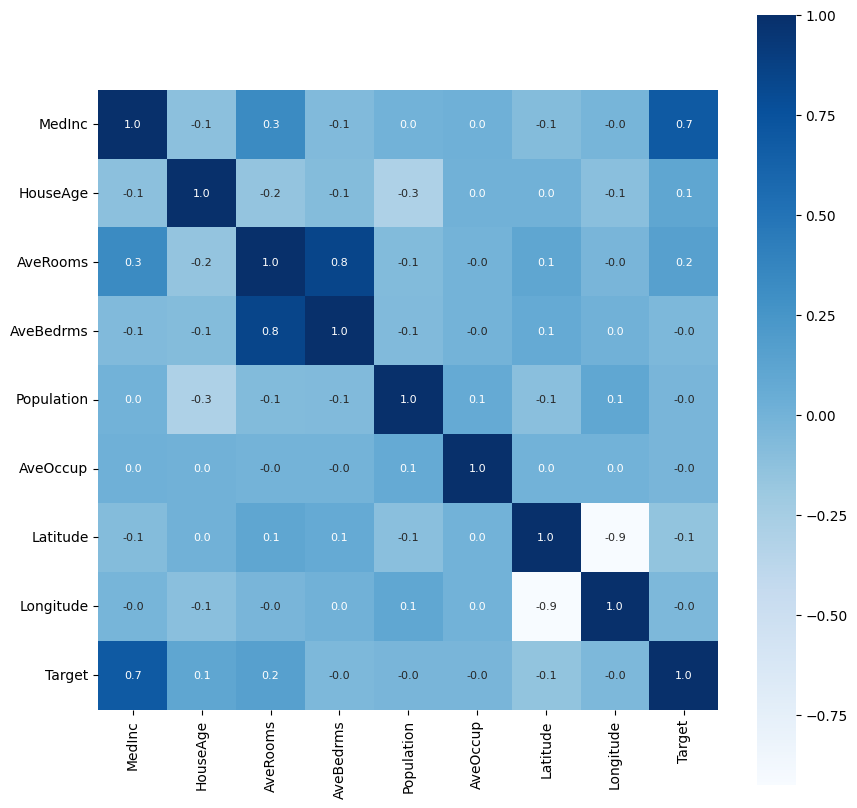

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt='.1f',annot_kws={'size':8},cbar=True,cmap='Blues')

Setting up the proper X and Y dataframes

In [14]:
X= df.iloc[:,0:8]
y= df.iloc[:,8:]

<h3>Performing Test Train Split</h3>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<h3>Using XGBRegression</h3>

I've performed Hyperparameter Tuning for achieving better metric scores

In [16]:
model =xg.XGBRegressor(n_estimators=500,max_depth=7,learning_rate=0.3)

In [17]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Finding the Metrics for both train and test data

In [18]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [19]:
print("R2 score on training data is: ", r2_score(y_train,y_train_pred))
print("MAE on training data is: ", mean_absolute_error(y_train,y_train_pred))

R2 score on training data is:  0.9993336006770328
MAE on training data is:  0.020558852481827306


In [20]:
print("R2 score on test data is: ", r2_score(y_test,y_test_pred))
print("MAE on test data is: ", mean_absolute_error(y_test,y_test_pred))

R2 score on test data is:  0.8358066177257257
MAE on test data is:  0.31119657544186413


<h3>Scatter Plot to demonstrate the model accuracy in Train and Test data</h3>

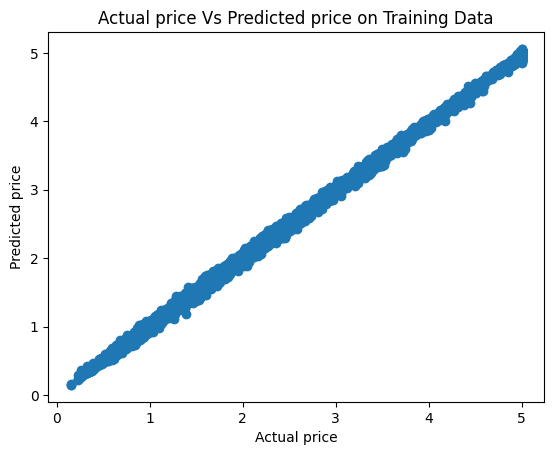

In [21]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price Vs Predicted price on Training Data")
plt.show()

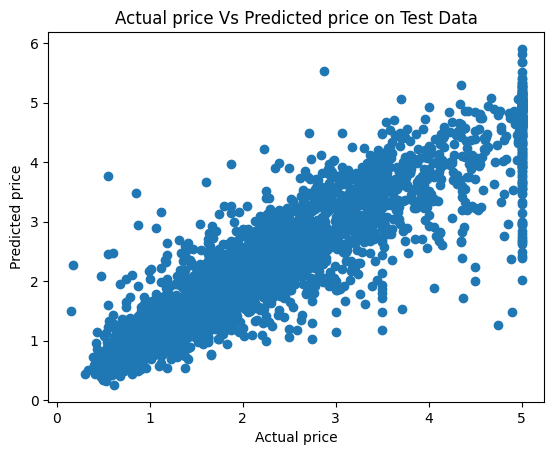

In [22]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price Vs Predicted price on Test Data")
plt.show()

In [23]:
import pickle

In [24]:
pickle.dump(model,open('Model.pkl','wb'))